In [1]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn import datasets
from sklearn import tree
import graphviz

In [3]:
irisset=datasets.load_iris()

In [4]:
X=irisset.data
Y=irisset.target


In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
clf=DecisionTreeClassifier(random_state=0,max_depth=5)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

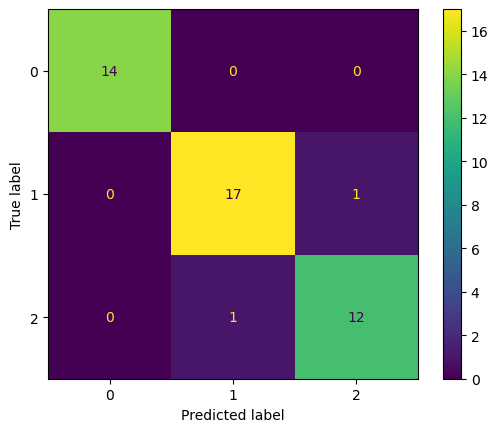

In [6]:
cnf_matrix=metrics.confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cnf_matrix,display_labels=None).plot()

In [32]:
accuracy=metrics.accuracy_score(y_pred,y_test)
print("The Accuracy Score is ",accuracy*100, "%")

The Accuracy Score is  95.55555555555556 %


In [13]:
irisset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 5.00
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.00
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



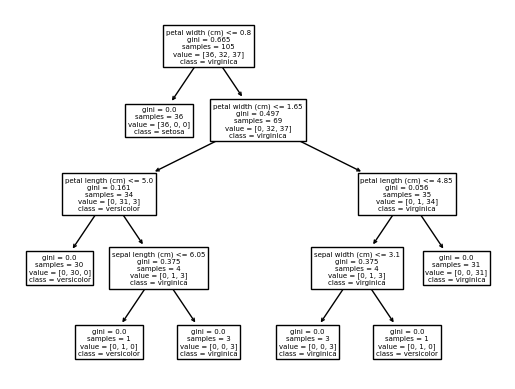

In [33]:
decplot=plot_tree(decision_tree=clf,feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],class_names=['setosa', 'versicolor', 'virginica'])
text_representation=tree.export_text(clf,feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
print(text_representation)

In [8]:
 dot_data = tree.export_graphviz(clf, out_file=None, feature_names=irisset.feature_names,  class_names=irisset.target_names,  
                  filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

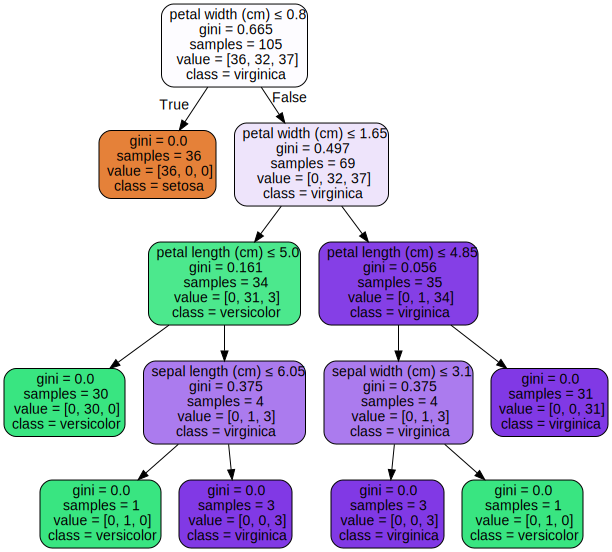

In [9]:
graph